<a href="https://colab.research.google.com/github/victorlee079/victorlee079.github.io/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import os
import sys
import numpy as np
from matplotlib import pyplot as plt

#os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # set to -1 denotes not to use GPU
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

def plot_prediction(im, label, pred):
	plt.imshow(im, cmap='gray')
	plt.axis('off')
	plt.title('label = {}, pred = {}'.format(label, pred))
	plt.savefig('prediction.png')	

# load data
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Basic Network

In [ ]:
# # network forward: baseline network is a two-layer network
# model = keras.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)), # Reform the data to 1D array
#   # Add Layers
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(128, activation='relu'),
#   # End
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

CNN

In [ ]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

model = keras.Sequential([
  tf.keras.layers.Conv2D(36, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(72, kernel_size=(3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

Compile and test

In [ ]:
# model compile: define optimizer & evaluation metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train 
model.fit(train_images, train_labels, epochs=10)

# test 
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.4100 - acc: 0.8490
Epoch 2/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.3012 - acc: 0.8877
Epoch 3/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.2684 - acc: 0.8987
Epoch 4/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.2420 - acc: 0.9094
Epoch 5/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.2270 - acc: 0.9131
Epoch 6/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.2131 - acc: 0.9210
Epoch 7/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.2001 - acc: 0.9248
Epoch 8/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.1900 - acc: 0.9277
Epoch 9/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.1812 - acc: 0.9323
Epoch 10/10
60000/60000 [==============================] - 

Basic Network Prediction

In [ ]:
# # prediction using first test case
# im = test_images[0]
# label = test_labels[0]
# pred = np.argmax(model.predict(im.reshape(1, 28, 28)))
# plot_prediction(im, label, pred)

CNN Prediction

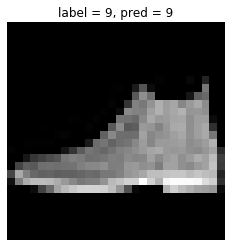

In [ ]:
# prediction using first test case
im = test_images[0]
label = test_labels[0]
r_im = np.expand_dims(im, axis=0)
pred = np.argmax(model.predict(r_im))
plot_prediction(im.reshape(28, 28), label, pred)